# Tarea_1 Adrian Rosales Flores

1.-Leer Imagen ESCOM 


Esta imagen es de tipo: uint8 con dimensiones: (1044, 1155, 3)


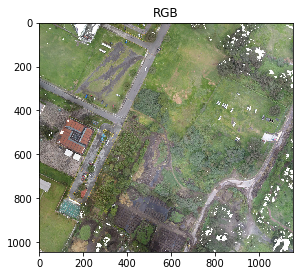

In [1]:
#Se importan las librerias necesarias 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#Leer imagen de ESCOM 
image = cv2.imread('ESCOM2_small.jpg')

#Mostrar la informacion y la imagen leída 
print('Esta imagen es de tipo:', image.dtype, 'con dimensiones:', image.shape)

# Obtener los tres canales de la imagen
b,g,r = cv2.split(image)

#Mostrar los canales 
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')





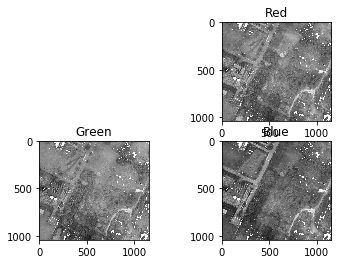

In [2]:
#Imprimir los canales por separado 
plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()


In [3]:
print(r)

print('\n El valor máximo en la imagen es:')
print(np.amax(r))
print('\n y valor minimo es:')
print(np.amin(r))

[[177 155 127 ..., 141 137 133]
 [118 110 103 ..., 139 135 131]
 [110 106 104 ..., 144 140 134]
 ..., 
 [255 255 252 ..., 123 120 119]
 [238 248 255 ..., 124 121 120]
 [151 178 180 ..., 125 122 120]]

 El valor máximo en la imagen es:
255

 y valor minimo es:
0


In [4]:
#Mostrar informacion del canal rojo y del canal verde 
print('Esta imagen es de tipo:', r.dtype, ', con dimensiones:', r.shape)
print('Esta imagen es de tipo:', r.dtype, ', con dimensiones:', r.shape)


Esta imagen es de tipo: uint8 , con dimensiones: (1044, 1155)
Esta imagen es de tipo: uint8 , con dimensiones: (1044, 1155)


Observemos que las dos imagenes comparten las mismas dimensiones entonces se puede realizar la suma/resta matricial, pero al ser las dos de tipo entero el rango esta limitado. Es por esos que tendremos que implementar la suma y resta pesada. O tambien se puede trabajar convirtiendo las dos imagenes a flotante. Probaremos con las dos soluciones sugeridas pero se tiene que guardar una copia de los dos canales r y g (rojo y verde). 

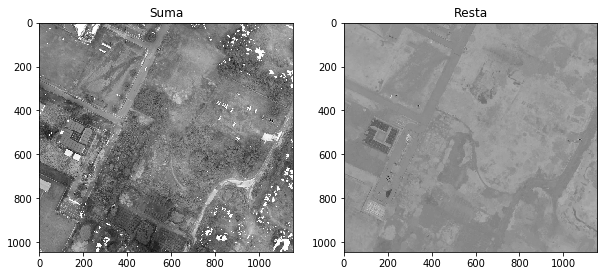

In [5]:
r1 = r
g1 = g
floatRed= r1.astype('float32')
floatGreen= g1.astype('float32')
divisor = floatRed + floatGreen
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(divisor,cmap='gray')
plt.title('Suma')
plt.subplot(2,2,2)
dividendo = floatGreen-floatRed
plt.imshow(dividendo,cmap='gray')
plt.title('Resta')


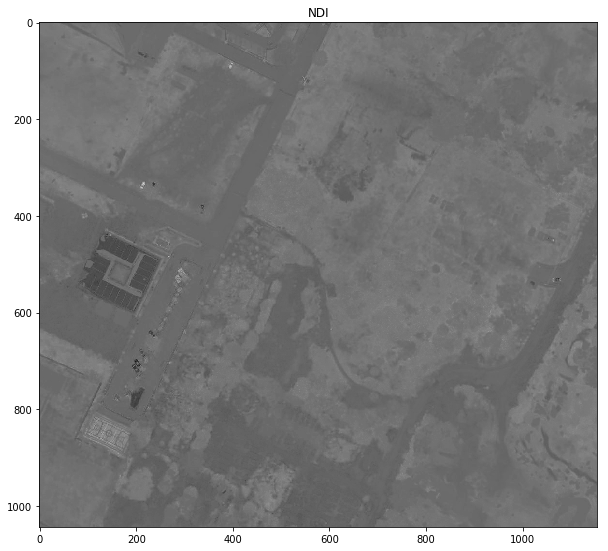

In [6]:
#Al realizar la operación de division 
NDI =  dividendo / divisor
plt.figure(figsize=(10, 10))
plt.title('NDI')
plt.imshow(NDI,cmap='gray')


Para visualizar el índice umbralizaremos la imagen

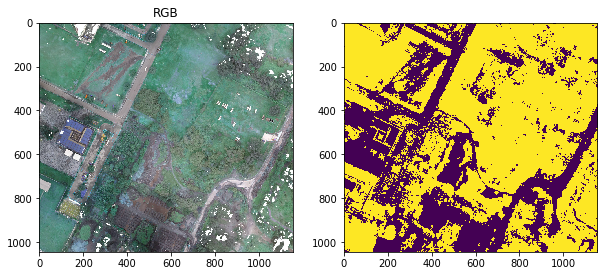

In [7]:
umbral = 0.001
# Thresholding
ret2,th1 =  cv2.threshold(NDI, umbral, 255.0, cv2.THRESH_BINARY)

# Comparación
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(th1)